<a href="https://colab.research.google.com/github/MGA215/Garncarz_MPA_MLF/blob/main/Lab04_PCA_KNN/MPA_MLF_PCA_2_students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA through Singular Value Decomposition

In [21]:
import numpy as np
# Defined 3 points in 2D-space:
X=np.array([[2, 1, 0],[4, 3, 0]])
# Calculate the covariance matrix:
R = np.matmul(X, X.T) / 2;
# Calculate the SVD decomposition and new basis vectors:
[U,D,V]=np.linalg.svd(R)  # call SVD decomposition
u1=U[:,0] # new basis vectors
u2=U[:,1]

# Calculate the coordinates in new orthonormal basis:
X_proj = np.matmul(U.T, X);

X_proj[1, :] = 0;
# print(X_proj);

# Calculate the approximation of the original from new basis
#print(Xi1[:,None]) # add second dimention to array and test it
X_rec = np.matmul(U, X_proj);
print(X)
print(X_rec)



# Check that you got the original
print(X_rec - X)


[[2 1 0]
 [4 3 0]]
[[1.80720735 1.27357371 0.        ]
 [4.08528566 2.87897923 0.        ]]
[[-0.19279265  0.27357371  0.        ]
 [ 0.08528566 -0.12102077  0.        ]]


# PCA on Iris data

In [22]:
# Load Iris dataset as in the last PC lab:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<function matplotlib.pyplot.show(close=None, block=None)>

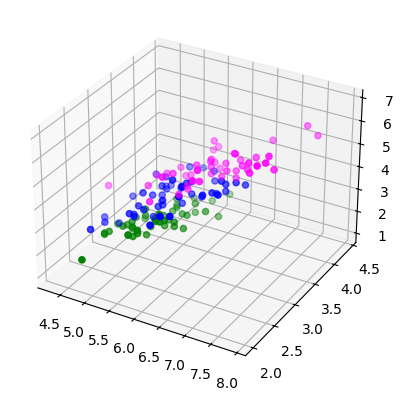

In [24]:
# We have 4 dimensions of data, plot the first three colums in 3D
X=iris.data
y=iris.target
import matplotlib.pyplot as plt
axes1=plt.axes(projection='3d')
axes1.scatter3D(X[y==0,0],X[y==0,1],X[y==0,2],color='green')
axes1.scatter3D(X[y==1,0],X[y==1,1],X[y==1,2],color='blue')
axes1.scatter3D(X[y==2,0],X[y==2,1],X[y==2,2],color='magenta')
plt.show


[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


<function matplotlib.pyplot.show(close=None, block=None)>

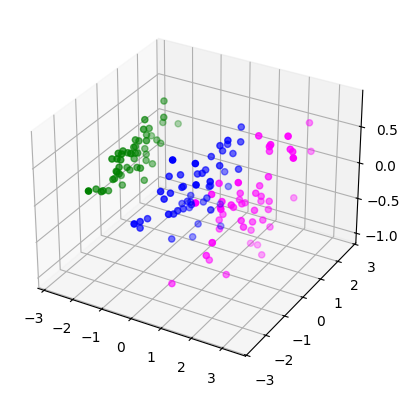

In [29]:
# Pre-processing is an important step, you can try either StandardScaler (zero mean, unit variance of features)
# or MinMaxScaler (to interval from 0 to 1)
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
Xscaler = StandardScaler()
Xpp=Xscaler.fit_transform(X)

# define PCA object (three components), fit and transform the data
pca = decomposition.PCA(n_components=3)
pca.fit(Xpp)
Xpca = pca.transform(Xpp)
print(pca.get_covariance())
# you can plot the transformed feature space in 3D:
axes2=plt.axes(projection='3d')
axes2.scatter3D(Xpca[y==0,0],Xpca[y==0,1],Xpca[y==0,2],color='green')
axes2.scatter3D(Xpca[y==1,0],Xpca[y==1,1],Xpca[y==1,2],color='blue')
axes2.scatter3D(Xpca[y==2,0],Xpca[y==2,1],Xpca[y==2,2],color='magenta')
plt.show


In [ ]:
# Compute pca.explained_variance_ and pca.explained_cariance_ratio_values
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182])

In [ ]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

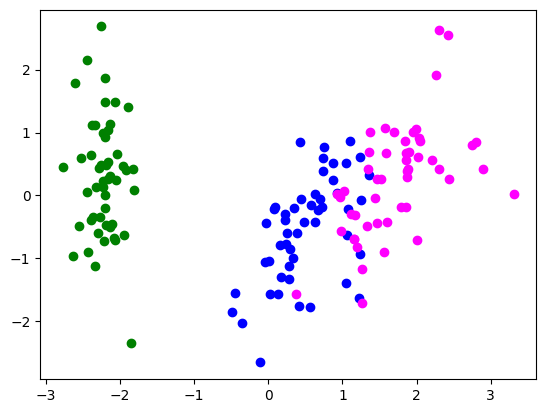

In [36]:
# Plot the principal components in 2D, mark different targets in color
plt.scatter(Xpca[y == 0, 0], Xpca[y == 0, 1], c="g")
plt.scatter(Xpca[y == 1, 0], Xpca[y == 1, 1], c="b")
plt.scatter(Xpca[y == 2, 0], Xpca[y == 2, 1], c="magenta")

# KNN classifier

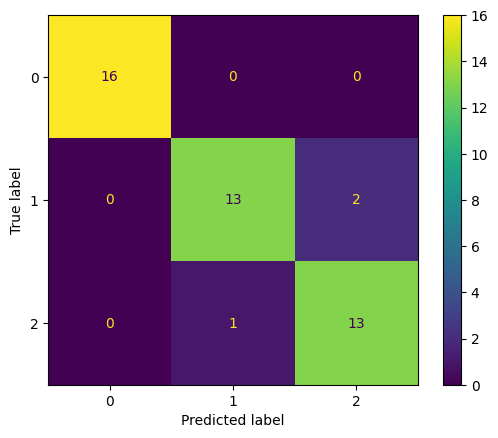

In [96]:
# KNN on original data, all 4 features

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

X_train, X_test, y_train, y_test = train_test_split(Xpp, y, test_size=0.3);

knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train, y_train)
Ypred=knn1.predict(X_test)
confusion_matrix(y_test, Ypred);
ConfusionMatrixDisplay.from_predictions(y_test, Ypred)



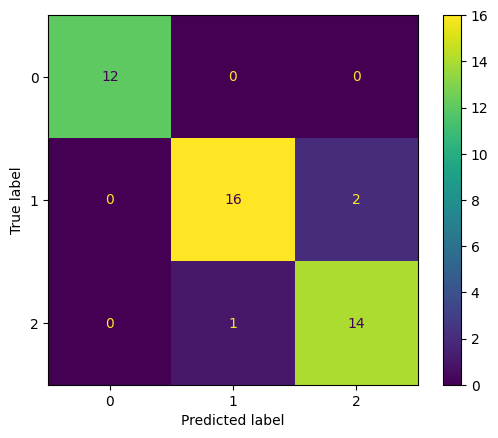

In [106]:
# KNN on XPCA data, all 3 features

X_train, X_test, y_train, y_test = train_test_split(Xpca, y, test_size=0.3);

knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train, y_train)
Ypred=knn1.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, Ypred)


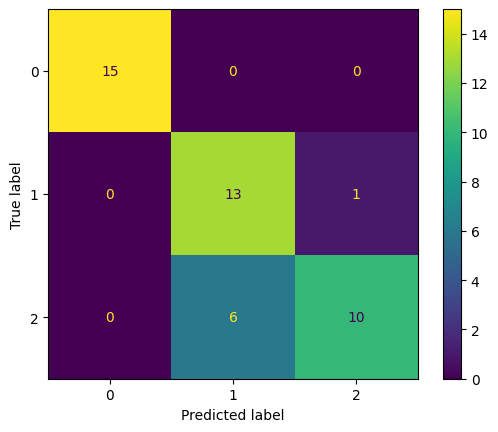

In [100]:
# KNN on XPP (original data) on first 3 features

X_train, X_test, y_train, y_test = train_test_split(Xpp[:, 0:3], y, test_size=0.3);

knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train, y_train)
Ypred=knn1.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, Ypred)


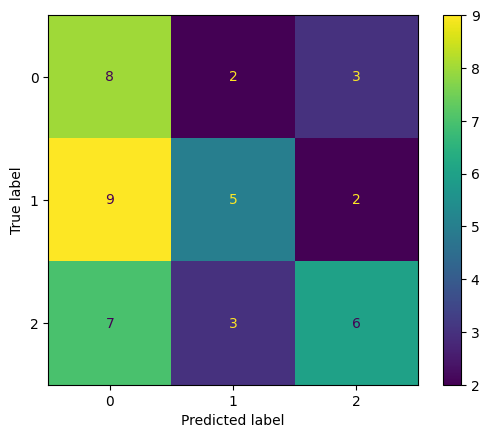

In [103]:
# XPCA, omit good feature

Xpca_mx = np.delete(Xpca, 0, 1);

X_train, X_test, y_train, y_test = train_test_split(Xpca_mx, y, test_size=0.3);

knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train, y_train)
Ypred=knn1.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, Ypred)

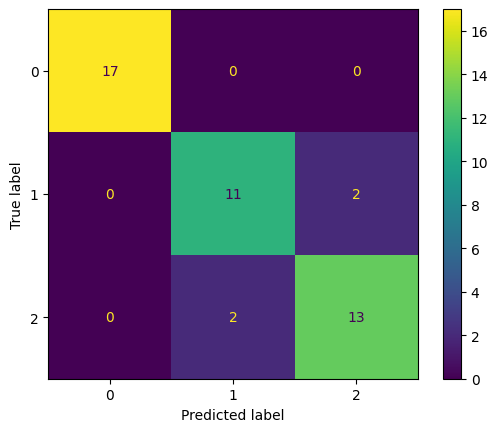

In [104]:
# XPCA, omit bad feature

Xpca_mx = np.delete(Xpca, 2, 1);

X_train, X_test, y_train, y_test = train_test_split(Xpca_mx, y, test_size=0.3);

knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train, y_train)
Ypred=knn1.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, Ypred)